In [1]:
!git clone https://github.com/karpathy/makemore.git

Cloning into 'makemore'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 64 (delta 20), reused 16 (delta 16), pack-reused 41
Receiving objects: 100% (64/64), 123.29 KiB | 1.52 MiB/s, done.
Resolving deltas: 100% (36/36), done.


In [2]:
!wget https://gist.github.com/mbejda/7f86ca901fe41bc14a63/archive/38adb475c14a3f44df9999c1541f3a72f472b30d.zip
!unzip 38adb475c14a3f44df9999c1541f3a72f472b30d.zip

--2024-05-30 20:21:49--  https://gist.github.com/mbejda/7f86ca901fe41bc14a63/archive/38adb475c14a3f44df9999c1541f3a72f472b30d.zip
Resolving gist.github.com (gist.github.com)... 140.82.112.4
Connecting to gist.github.com (gist.github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/gist/7f86ca901fe41bc14a63/zip/38adb475c14a3f44df9999c1541f3a72f472b30d [following]
--2024-05-30 20:21:49--  https://codeload.github.com/gist/7f86ca901fe41bc14a63/zip/38adb475c14a3f44df9999c1541f3a72f472b30d
Resolving codeload.github.com (codeload.github.com)... 140.82.114.9
Connecting to codeload.github.com (codeload.github.com)|140.82.114.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘38adb475c14a3f44df9999c1541f3a72f472b30d.zip’

38adb475c14a3f44df9     [ <=>                ]  68.09K  --.-KB/s    in 0.05s   

2024-05-30 20:21:49 (1.32 MB/s) - ‘38adb475c14a3f44df9

In [3]:
import pandas as pd
file_path = '/content/7f86ca901fe41bc14a63-38adb475c14a3f44df9999c1541f3a72f472b30d/Indian-Male-Names.csv'
df = pd.read_csv(file_path)
names = df['name']
output_file = 'names.txt'
names.to_csv(output_file, index=False, header=False)

In [4]:
words=open('names.txt','r').read().splitlines()

In [5]:
alphabets = set("abcdefghijklmnopqrstuvwxyz")
words = [name for name in words if all(char in alphabets for char in name.lower())]


In [6]:
words[0]="samyak"
words[:10]

['samyak',
 'amit',
 'kushal',
 'kasid',
 'sanjay',
 'abhi',
 'chanderpal',
 'aman',
 'khursid',
 'rajeev']

In [7]:
len(words)

6429

In [8]:
min(len(w) for w in words)

2

In [9]:
max(len(w) for w in words)

19

In [10]:
b={}
for w in words:
  chs=['<S>']+list(w)+['<E>']
  for ch1,ch2 in zip(chs,chs[1:]):
    bigram=(ch1,ch2)
    b[bigram]=b.get(bigram,0)+1

In [11]:
sorted(b.items(),key=lambda kv: -kv[1])

[(('s', 'h'), 1564),
 (('a', 'n'), 1441),
 (('r', 'a'), 1354),
 (('<S>', 's'), 1218),
 (('h', '<E>'), 925),
 (('<S>', 'r'), 877),
 (('<S>', 'a'), 854),
 (('h', 'a'), 828),
 (('a', 'r'), 792),
 (('n', '<E>'), 761),
 (('a', 'm'), 694),
 (('r', '<E>'), 677),
 (('d', 'e'), 674),
 (('l', '<E>'), 642),
 (('s', 'a'), 630),
 (('e', 'e'), 622),
 (('a', 'j'), 584),
 (('n', 'd'), 558),
 (('m', 'a'), 525),
 (('h', 'i'), 501),
 (('a', 'l'), 493),
 (('t', '<E>'), 486),
 (('<S>', 'm'), 484),
 (('u', '<E>'), 477),
 (('e', 's'), 475),
 (('v', 'i'), 467),
 (('a', 's'), 448),
 (('i', 'n'), 437),
 (('p', 'a'), 434),
 (('i', 't'), 433),
 (('e', 'r'), 422),
 (('m', '<E>'), 412),
 (('i', 's'), 408),
 (('<S>', 'd'), 406),
 (('k', 'a'), 393),
 (('j', 'a'), 378),
 (('a', 'k'), 367),
 (('<S>', 'v'), 361),
 (('e', 'n'), 347),
 (('s', 'u'), 330),
 (('n', 'a'), 328),
 (('<S>', 'p'), 314),
 (('<S>', 'k'), 306),
 (('a', 'h'), 298),
 (('d', '<E>'), 286),
 (('e', 'p'), 281),
 (('<S>', 'n'), 276),
 (('j', '<E>'), 273),


In [12]:
import torch

In [13]:
N = torch.zeros((27,27),dtype=torch.int32)

In [14]:
chars=sorted(list(set(''.join(words))))
stoi= {s:i+1 for i,s in enumerate(chars)}
stoi['.']=0
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [15]:
for w in words:
  chs=['.']+list(w)+['.']
  for ch1,ch2 in zip(chs,chs[1:]):
    ix1=stoi[ch1]
    ix2=stoi[ch2]
    N[ix1,ix2] += 1

In [16]:
itos={i:s for s,i in stoi.items()}

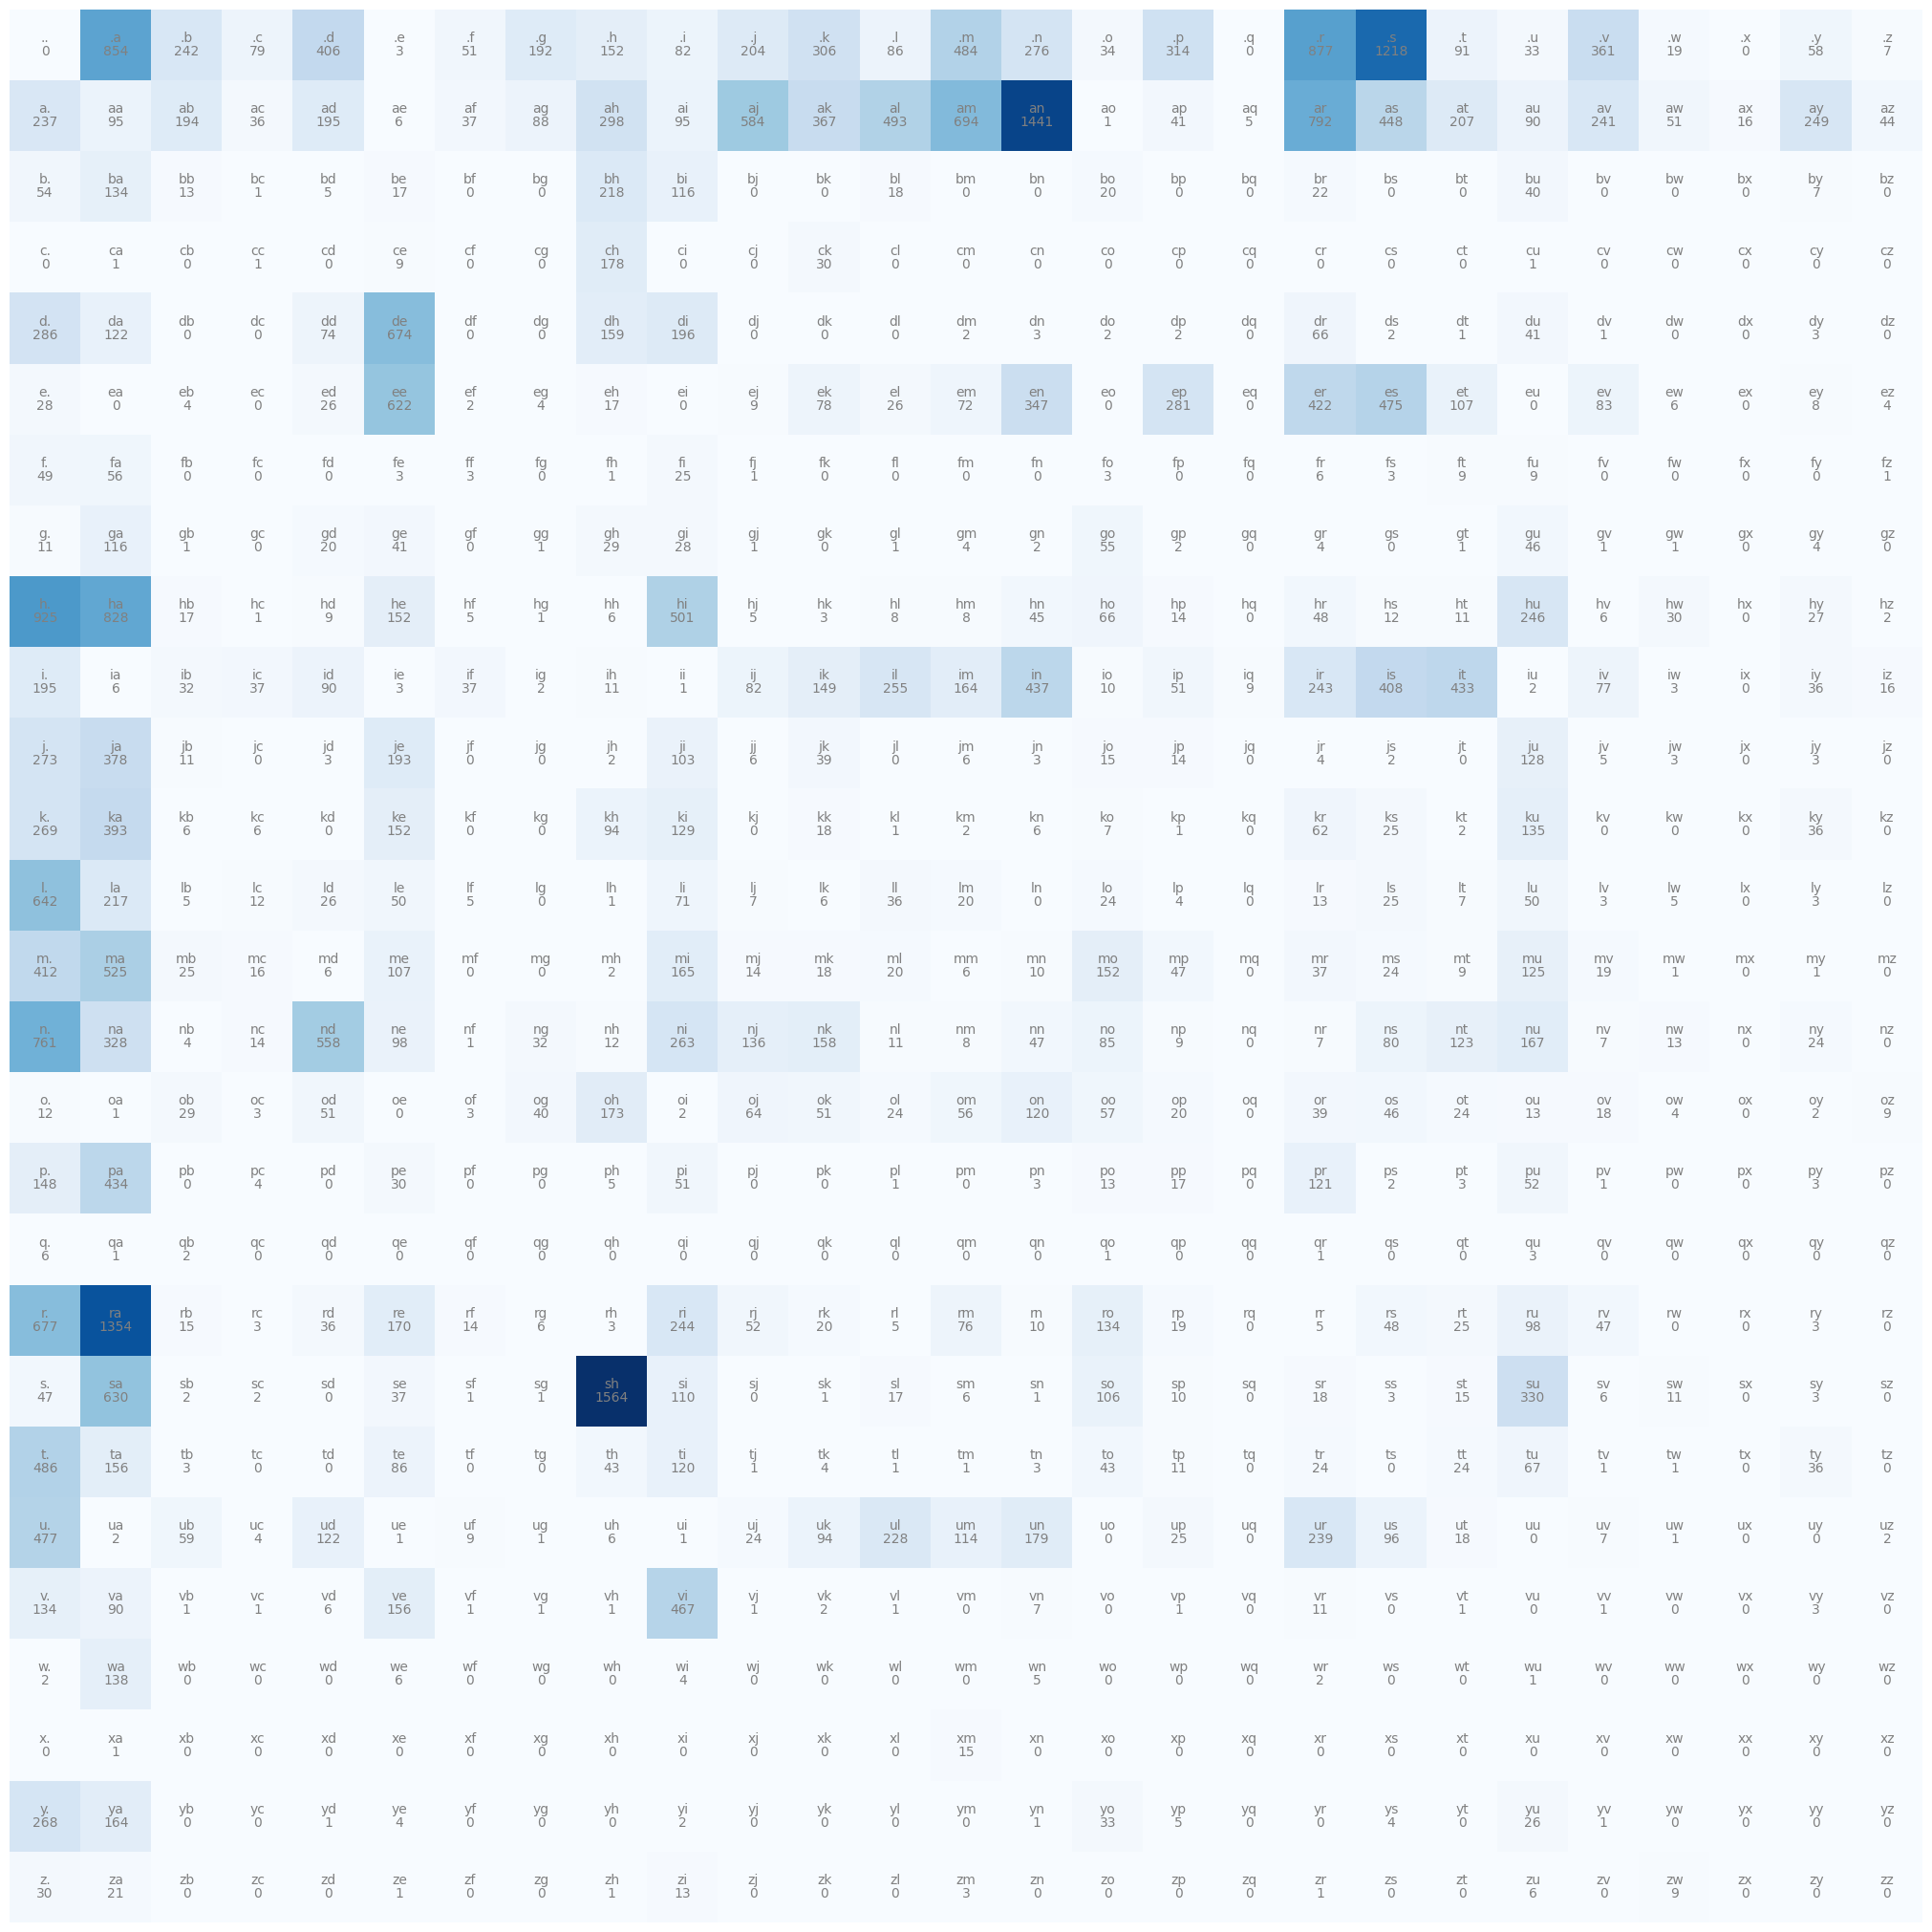

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(26,26))
plt.imshow(N,cmap='Blues')
for i in range(27):
  for j in range(27):
    chstr=itos[i]+itos[j]
    plt.text(j,i,chstr,ha="center",va="bottom",color="gray")
    plt.text(j,i,N[i,j].item(),ha="center",va="top",color="gray")
plt.axis('off');


In [18]:
N[0]

tensor([   0,  854,  242,   79,  406,    3,   51,  192,  152,   82,  204,  306,
          86,  484,  276,   34,  314,    0,  877, 1218,   91,   33,  361,   19,
           0,   58,    7], dtype=torch.int32)

In [19]:
p=N[0].float()
p=p/p.sum()
p

tensor([0.0000, 0.1328, 0.0376, 0.0123, 0.0632, 0.0005, 0.0079, 0.0299, 0.0236,
        0.0128, 0.0317, 0.0476, 0.0134, 0.0753, 0.0429, 0.0053, 0.0488, 0.0000,
        0.1364, 0.1895, 0.0142, 0.0051, 0.0562, 0.0030, 0.0000, 0.0090, 0.0011])

In [20]:
g=torch.Generator().manual_seed(19)
ix=torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
ix
itos[ix]

's'

In [21]:
P = N.float()

In [22]:
P.sum(1,keepdim=True).shape

torch.Size([27, 1])

In [23]:
P = P/P.sum(1,keepdim=True)

In [24]:
P[0].sum()

tensor(1.)

In [25]:
g=torch.Generator().manual_seed(19)

for i in range(10):
  out=[]
  ix=0
  while True:
    p=P[ix]
    ix=torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
    out.append(itos[ix])
    if ix==0:
      break
  print(''.join(out))

shajith.
meepal.
kararaninodijee.
sanwnkundeetrilanjer.
il.
vinkamalsohin.
ahubhit.
z.
shin.
sh.


In [26]:
log_likelihood=0.0
n=0
for w in words:
# for w in ['kunalq']:
  chs=['.']+list(w)+['.']
  for ch1,ch2 in zip(chs,chs[1:]):
    ix1=stoi[ch1]
    ix2=stoi[ch2]
    prob=P[ix1,ix2]
    logprob=torch.log(prob)
    log_likelihood+=logprob
    n+=1
    # print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll=-log_likelihood
print(f'{nll=}')

print(f'{nll/n}')

log_likelihood=tensor(-99490.8594)
nll=tensor(99490.8594)
2.182152032852173


In [27]:
xs,ys=[],[]

for w in words[:1]:
  chs=['.']+list(w)+['.']
  for ch1,ch2 in zip(chs,chs[1:]):
    ix1=stoi[ch1]
    ix2=stoi[ch2]
    print(f'{ch1} {ch2}')
    xs.append(ix1)
    ys.append(ix2)
xs=torch.tensor(xs)
ys=torch.tensor(ys)

. s
s a
a m
m y
y a
a k
k .


In [28]:
xs

tensor([ 0, 19,  1, 13, 25,  1, 11])

In [29]:
ys

tensor([19,  1, 13, 25,  1, 11,  0])

In [30]:
import torch.nn.functional as F
xenc=F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [31]:
xenc.shape

torch.Size([7, 27])

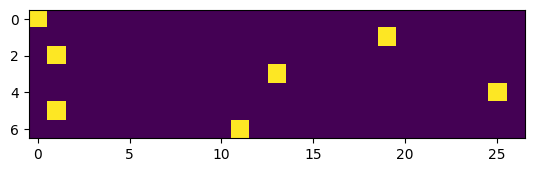

In [32]:
plt.imshow(xenc)

In [33]:
xenc.dtype

torch.float32

In [34]:
W = torch.randn((27,27))

In [35]:
xenc[0]

tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [36]:
W

tensor([[-0.4641,  1.1674,  0.8591,  0.1930, -0.2059,  0.0372, -0.6009, -0.8304,
         -0.1000,  0.8247, -0.2269,  1.1232, -0.2830, -0.8571, -0.2798,  1.9079,
          0.1950, -0.6074,  0.9587,  0.3724, -0.4825,  0.7468,  1.0654, -1.6021,
         -1.1463,  0.6658, -0.1459],
        [ 0.5176, -0.6592, -0.8013,  1.3174,  0.6763, -0.9872,  1.5259,  1.1870,
         -0.9071,  0.9285, -0.0604,  0.4699,  0.4426, -1.9265, -0.6140,  0.0113,
         -0.5603, -2.1876, -2.3064,  0.1307,  0.4405, -0.0406,  0.3255, -0.5182,
          0.6942, -0.7563,  0.2272],
        [ 0.5643,  1.2438,  0.3344,  0.2948, -0.5669, -0.1264, -1.8372, -1.5732,
         -0.5688,  1.8388, -0.8914, -1.0117,  0.3825,  0.5857,  0.3354,  0.2364,
          1.2144, -0.0937, -0.3360, -0.3786, -1.1847,  0.2798, -0.0366, -0.5115,
         -0.4637,  1.4069, -0.4145],
        [-1.3522,  0.6772,  0.4701,  0.4908, -1.4738,  0.7338, -0.7995,  0.0380,
          1.4728, -1.6414,  1.1185, -0.3712, -0.0329,  0.0886,  0.3630,  0.0568

In [37]:
print(f'{xenc.shape}  {W.shape}')

torch.Size([7, 27])  torch.Size([27, 27])


In [38]:
xenc[0] @ W

tensor([-0.4641,  1.1674,  0.8591,  0.1930, -0.2059,  0.0372, -0.6009, -0.8304,
        -0.1000,  0.8247, -0.2269,  1.1232, -0.2830, -0.8571, -0.2798,  1.9079,
         0.1950, -0.6074,  0.9587,  0.3724, -0.4825,  0.7468,  1.0654, -1.6021,
        -1.1463,  0.6658, -0.1459])

In [39]:
(xenc[0] @ W).exp()

tensor([0.6287, 3.2135, 2.3611, 1.2129, 0.8139, 1.0379, 0.5483, 0.4359, 0.9048,
        2.2811, 0.7970, 3.0746, 0.7535, 0.4244, 0.7559, 6.7393, 1.2154, 0.5447,
        2.6084, 1.4512, 0.6172, 2.1102, 2.9020, 0.2015, 0.3178, 1.9460, 0.8642])

In [40]:
xenc @ W

tensor([[-0.4641,  1.1674,  0.8591,  0.1930, -0.2059,  0.0372, -0.6009, -0.8304,
         -0.1000,  0.8247, -0.2269,  1.1232, -0.2830, -0.8571, -0.2798,  1.9079,
          0.1950, -0.6074,  0.9587,  0.3724, -0.4825,  0.7468,  1.0654, -1.6021,
         -1.1463,  0.6658, -0.1459],
        [-0.4894, -0.8945,  0.0998, -0.1124,  1.2596, -0.7265,  1.9457,  1.3014,
         -0.9990,  1.1359, -0.8328,  0.4131,  0.2251, -0.7896,  0.6235, -0.6290,
         -1.9311, -1.4952, -1.1469,  1.1372,  1.3886, -2.1749,  0.9254,  0.8828,
         -0.0297,  0.3787, -0.7008],
        [ 0.5176, -0.6592, -0.8013,  1.3174,  0.6763, -0.9872,  1.5259,  1.1870,
         -0.9071,  0.9285, -0.0604,  0.4699,  0.4426, -1.9265, -0.6140,  0.0113,
         -0.5603, -2.1876, -2.3064,  0.1307,  0.4405, -0.0406,  0.3255, -0.5182,
          0.6942, -0.7563,  0.2272],
        [ 1.3460, -0.6093, -1.5369,  0.8346,  0.3132, -1.6181,  1.6071, -0.4459,
         -0.3671, -0.3061, -0.4447, -0.7696,  0.9038,  2.2209, -0.7275,  0.3550

In [41]:
(xenc @ W)[3,13]

tensor(2.2209)

In [42]:
logits=xenc @ W
counts =logits.exp()
probs=counts/counts.sum(1,keepdims=True)
probs

tensor([[0.0154, 0.0788, 0.0579, 0.0298, 0.0200, 0.0255, 0.0135, 0.0107, 0.0222,
         0.0560, 0.0196, 0.0754, 0.0185, 0.0104, 0.0185, 0.1653, 0.0298, 0.0134,
         0.0640, 0.0356, 0.0151, 0.0518, 0.0712, 0.0049, 0.0078, 0.0477, 0.0212],
        [0.0142, 0.0095, 0.0257, 0.0208, 0.0819, 0.0112, 0.1626, 0.0854, 0.0086,
         0.0724, 0.0101, 0.0351, 0.0291, 0.0106, 0.0434, 0.0124, 0.0034, 0.0052,
         0.0074, 0.0725, 0.0932, 0.0026, 0.0586, 0.0562, 0.0226, 0.0339, 0.0115],
        [0.0473, 0.0146, 0.0127, 0.1053, 0.0554, 0.0105, 0.1297, 0.0924, 0.0114,
         0.0714, 0.0265, 0.0451, 0.0439, 0.0041, 0.0153, 0.0285, 0.0161, 0.0032,
         0.0028, 0.0321, 0.0438, 0.0271, 0.0390, 0.0168, 0.0564, 0.0132, 0.0354],
        [0.0747, 0.0106, 0.0042, 0.0448, 0.0266, 0.0039, 0.0970, 0.0125, 0.0135,
         0.0143, 0.0125, 0.0090, 0.0480, 0.1792, 0.0094, 0.0277, 0.0552, 0.1186,
         0.0067, 0.0948, 0.0376, 0.0125, 0.0251, 0.0128, 0.0132, 0.0232, 0.0126],
        [0.0570, 0.0112,

In [43]:
probs.shape

torch.Size([7, 27])

In [44]:
probs[0]

tensor([0.0154, 0.0788, 0.0579, 0.0298, 0.0200, 0.0255, 0.0135, 0.0107, 0.0222,
        0.0560, 0.0196, 0.0754, 0.0185, 0.0104, 0.0185, 0.1653, 0.0298, 0.0134,
        0.0640, 0.0356, 0.0151, 0.0518, 0.0712, 0.0049, 0.0078, 0.0477, 0.0212])

In [45]:
probs[0].sum()

tensor(1.0000)

In [46]:
xs

tensor([ 0, 19,  1, 13, 25,  1, 11])

In [47]:
ys

tensor([19,  1, 13, 25,  1, 11,  0])

In [48]:
nlls = torch.zeros(7)
for i in range(7):
  x=xs[i].item()
  y=ys[i].item()
  print('-----------------')
  print(f'bigram example{i+1}: {itos[x]} {itos[y]} ( indexes: {x},{y})')
  print('input to the neural net: ',x)
  print('output prob from the neural net: ',probs[i])
  print('actual next character: ',y)
  p=probs[i,y]
  print('prob assigned by the neural net the the ans: ', p.item)
  logp=torch.log(p)
  nll=-logp
  print(f'{nll:}')
  nlls[i]=nll

print("===================")
print('avg nll , i.e loss: ',nlls.mean().item())

-----------------
bigram example1: . s ( indexes: 0,19)
input to the neural net:  0
output prob from the neural net:  tensor([0.0154, 0.0788, 0.0579, 0.0298, 0.0200, 0.0255, 0.0135, 0.0107, 0.0222,
        0.0560, 0.0196, 0.0754, 0.0185, 0.0104, 0.0185, 0.1653, 0.0298, 0.0134,
        0.0640, 0.0356, 0.0151, 0.0518, 0.0712, 0.0049, 0.0078, 0.0477, 0.0212])
actual next character:  19
prob assigned by the neural net the the ans:  <built-in method item of Tensor object at 0x7a6c1305b240>
3.3353285789489746
-----------------
bigram example2: s a ( indexes: 19,1)
input to the neural net:  19
output prob from the neural net:  tensor([0.0142, 0.0095, 0.0257, 0.0208, 0.0819, 0.0112, 0.1626, 0.0854, 0.0086,
        0.0724, 0.0101, 0.0351, 0.0291, 0.0106, 0.0434, 0.0124, 0.0034, 0.0052,
        0.0074, 0.0725, 0.0932, 0.0026, 0.0586, 0.0562, 0.0226, 0.0339, 0.0115])
actual next character:  1
prob assigned by the neural net the the ans:  <built-in method item of Tensor object at 0x7a6c1305bc90>
4

In [49]:
xs

tensor([ 0, 19,  1, 13, 25,  1, 11])

In [50]:
probs[0,0], probs[1,19], probs[2,1] ,probs[3,13], probs[4,25] , probs[5,1], probs[6,11]

(tensor(0.0154),
 tensor(0.0725),
 tensor(0.0146),
 tensor(0.1792),
 tensor(0.1137),
 tensor(0.0146),
 tensor(0.0267))

In [51]:
g=torch.Generator().manual_seed(19)
W=torch.randn((27,27), generator=g, requires_grad=True)

In [52]:
# Forward pass
xenc=F.one_hot(xs, num_classes=27).float()
logits=xenc @ W
counts =logits.exp()
probs=counts/counts.sum(1,keepdims=True)
loss=-probs[torch.arange(7),ys].log().mean()

In [53]:
# Backward pass
W.grad=None
loss.backward()

In [54]:
W.grad

tensor([[ 0.0146,  0.0059,  0.0032,  0.0021,  0.0061,  0.0047,  0.0012,  0.0036,
          0.0004,  0.0026,  0.0242,  0.0127,  0.0035,  0.0040,  0.0033,  0.0034,
          0.0016,  0.0031,  0.0129, -0.1418,  0.0057,  0.0014,  0.0091,  0.0066,
          0.0010,  0.0035,  0.0015],
        [ 0.0066,  0.0144,  0.0144,  0.0044,  0.0066,  0.0008,  0.0005,  0.0104,
          0.0107,  0.0126,  0.0030, -0.1370,  0.0258, -0.1294,  0.0066,  0.0218,
          0.0167,  0.0086,  0.0129,  0.0048,  0.0586,  0.0030,  0.0020,  0.0028,
          0.0030,  0.0021,  0.0132],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [55]:
W.data+=-0.1*W.grad

In [56]:
# Forward pass
xenc=F.one_hot(xs, num_classes=27).float()
logits=xenc @ W
counts =logits.exp()
probs=counts/counts.sum(1,keepdims=True)
loss=-probs[torch.arange(7),ys].log().mean()
loss

tensor(3.7193, grad_fn=<NegBackward0>)

In [57]:
xs,ys=[],[]

for w in words:
  chs=['.']+list(w)+['.']
  for ch1,ch2 in zip(chs,chs[1:]):
    ix1=stoi[ch1]
    ix2=stoi[ch2]
    # print(f'{ch1} {ch2}')
    xs.append(ix1)
    ys.append(ix2)
xs=torch.tensor(xs)
ys=torch.tensor(ys)
num=xs.nelement()
print('no. if examples:',num)

g=torch.Generator().manual_seed(19)
W=torch.randn((27,27), generator=g, requires_grad=True)

no. if examples: 45593


In [58]:
(W**2).mean()

tensor(0.9995, grad_fn=<MeanBackward0>)

In [59]:
# gradient descent
for k in range(1000):
  # Forward pass
  xenc=F.one_hot(xs, num_classes=27).float()
  logits=xenc @ W
  counts =logits.exp()
  probs=counts/counts.sum(1,keepdims=True)
  loss=-probs[torch.arange(num),ys].log().mean() + 0.0001*(W**2).mean()
  print(loss.item())
  # Backward pass
  W.grad=None
  loss.backward()

  # Update
  W.data+=-50*W.grad

3.6246092319488525
3.161041736602783
2.8931641578674316
2.742185115814209
2.6442744731903076
2.5742688179016113
2.521733283996582
2.4809467792510986
2.4485461711883545
2.4222962856292725
2.400607109069824
2.382344961166382
2.3667101860046387
2.3531408309936523
2.341233968734741
2.330693244934082
2.321294069290161
2.3128628730773926
2.3052635192871094
2.2983858585357666
2.2921407222747803
2.2864537239074707
2.2812628746032715
2.2765142917633057
2.2721617221832275
2.268165349960327
2.264488697052002
2.2611005306243896
2.2579727172851562
2.2550792694091797
2.252398729324341
2.2499101161956787
2.2475948333740234
2.2454373836517334
2.243422508239746
2.241537570953369
2.2397711277008057
2.2381112575531006
2.2365498542785645
2.2350776195526123
2.233687400817871
2.2323715686798096
2.2311251163482666
2.2299423217773438
2.2288174629211426
2.2277469635009766
2.226726531982422
2.225752353668213
2.2248213291168213
2.223930835723877
2.2230782508850098
2.2222602367401123
2.221475601196289
2.220721721

In [60]:
# Before
g=torch.Generator().manual_seed(19)

for i in range(10):
  out=[]
  ix=0
  while True:
    # xenc=F.one_hot(torch.tensor([ix]), num_classes=27).float()
    # logits=xenc @ W
    # counts =logits.exp()
    # p=counts/counts.sum(1,keepdims=True)
    p=P[ix]
    ix=torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
    out.append(itos[ix])
    if ix==0:
      break
  print(''.join(out))

shajith.
meepal.
kararaninodijee.
sanwnkundeetrilanjer.
il.
vinkamalsohin.
ahubhit.
z.
shin.
sh.


In [61]:
# After
g=torch.Generator().manual_seed(19)

for i in range(21):
  out=[]
  ix=0
  while True:
    xenc=F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits=xenc @ W
    counts =logits.exp()
    p=counts/counts.sum(1,keepdims=True)
    # p=P[ix]
    ix=torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
    out.append(itos[ix])
    if ix==0:
      break
  print(''.join(out))

shajith.
meepal.
kararaninodijee.
sanwnkundeetrilanjer.
il.
vinkamalsohin.
ahubhit.
z.
shin.
sh.
sanjoh.
rarisahiti.
k.
f.
gaheserarajeresh.
shinan.
r.
mopriun.
pand.
shul.
saj.
